<a href="https://colab.research.google.com/github/ricardribalta/03_MAIR_Algoritmos_de_Optimizacion/blob/main/Algoritmos_AG2_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 2
Nombre: Ricard Ribalta 

URL: https://colab.research.google.com/drive/1seC1K9zSg6A9pGTwcKSA_AKy0zXamhSf?usp=sharing

Github: https://github.com/ricardribalta/03_MAIR_Algoritmos_de_Optimizacion.git

In [ ]:
tarifa = [
[0,5,4,3,999,999,999],
[999,0,999,2,3,999,11],
[999,999, 0,1,999,4,10],
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [ ]:
def Precios(tarifas): 
  n = len(tarifas[0])
  precios = [ [9999] * n for i in [9999] * n]
  ruta = [ [""] * n for i in [""] * n]
  for i in range(n - 1):
    for j in range(i + 1, n):
      Min = tarifas[i][j]
      ruta[i][j] = i
      for k in range(i, j):
        if precios[i][k] + tarifas[k][j] < Min:
            Min = min(Min, precios[i][k] + tarifas[k][j] )
            ruta[i][j] = k
        precios[i][j] = Min
        
  return precios,ruta

In [ ]:
precio,ruta = Precios(tarifa)
 #print(PRECIOS[0][6])

print("Precios")
for i in range(len(tarifa)):
  print(precio[i])

print("\n Rutata")  
for i in range(len(tarifa)):
  print(ruta[i]) 

Precios
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

 Rutata
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [ ]:
def Calcular_ruta(ruta, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(Calcular_ruta(ruta, desde, ruta[desde][hasta])) +  ',' + str(ruta[desde][hasta]) 

print("La ruta más económica es:")  
Calcular_ruta(ruta, 0,6) 

La ruta más económica es:


'0,0,2,5'

##Problema de Asignacion de tarea

In [ ]:

coste2=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]
        ]


In [ ]:
def Valor(s,costes):
  valor = 0
  for i in range(len(s)):
    valor += costes[s[i]][i] 
  return valor
  
Valor((0, 1, 2, 3),coste2)

73

In [ ]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CosteInferior(s,costes):
  valor = 0
  #Valores establecidos
  for i in range(len(s)):
    valor += costes[i][s[i]]

  #Estimacion
  for i in range( len(s), len(costes)   ):
    valor += min( [ costes[j][i] for j in range(len(s), len(costes))  ])
  return valor

def CosteSuperior(s,costes):
  valor = 0
  #Valores establecidos
  for i in range(len(s)):
    valor += costes[i][s[i]]

  #Estimacion
  for i in range( len(s), len(costes)   ):
    valor += max( [ costes[j][i] for j in range(len(s), len(costes))  ])
  return valor

CosteSuperior((0,1),coste2)



74

In [ ]:
#Genera tantos hijos como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def CrearHijos(nodo, n):
  hijos = []
  for i in range(n):
    if i not in nodo:
      hijos.append({'s':nodo +(i,)    })
  return hijos

In [ ]:
def Ramificacion_y_poda(costes):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  dimension = len(costes)  
  mejorSolucion=tuple( i for i in range(len(costes)) )
  CotaSup = Valor(mejorSolucion,costes)
  #print(mejorSolucion)
  #print("Cota Superior:", CotaSup)

  nodos=[]
  nodos.append({'s':(), 'ci':CosteInferior((),costes)} )

  iteracion = 0

  while( len(nodos) > 0):
    iteracion +=1

    nodo_prometedor = [ min(nodos, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    hijos =[ {'s':x['s'], 'ci':CosteInferior(x['s'], costes)   } for x in CrearHijos(nodo_prometedor, dimension)]
    #print("hijos " + str(hijos))
    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    nodoFinal = [x for x in hijos if len(x['s']) == dimension  ]
    if len(nodoFinal) > 0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if nodoFinal[0]['ci'] < CotaSup:
        CotaSup = nodoFinal[0]['ci']
        mejorSolucion = nodoFinal
 
    #Poda
    hijos = [x for x in hijos if x['ci'] < CotaSup]

    #Añadimos los hijos 
    nodos.extend(hijos) 

    #Eliminamos el nodo ramificado
    nodos =  [  x for x in nodos if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,mejorSolucion , " en " , iteracion , " iteraciones" , " para dimension: " ,dimension  )
      


Ramificacion_y_poda(coste2)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Descenso del gradiente

In [ ]:
import math                      
import matplotlib.pyplot as plt  
import numpy as np                
import scipy as sc
import random

In [ ]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2+X[1]**2      #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

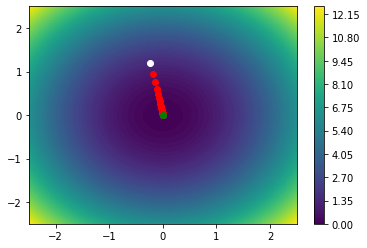

Solucion: [-8.10714294266653e-50, 4.179286282950203e-49] 1.8123691501784002e-97


In [ ]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

#Generamos un punto aleatorio
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje
TA=.1 

#Iteraciones
for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))

# Practica: Ramificación y Poda
## Análisis para mejorar nota:

¿Que complejidad tiene el algoritmo por fuerza bruta?



*solucionar el problema "Asignación de tareas" por fuerza buta supone una complejidad de n!

In [ ]:
import itertools    

def AsignacionTareasFuerzaBruta(costes):
  costeMin = 10e10
  convinacionMin = ()
  for s in list(itertools.permutations(range(len(costes)))):
    valorTemp = Valor(s, costes)
    if valorTemp < costMin:
      costeMin = valorTemp
      convinacionMin = s
  return costeMin, convinacionMin

costMin, convMin = AsignacionTareasFuerzaBruta(coste2)

costMin, convMin




(61, (0, 3, 1, 2))

Generar matrices con valores aleatorios de mayores
dimensiones (5,6,7,…) y ejecutar ambos algoritmos.

In [ ]:


def CostesN(n):
  i = 0
  costesN = []
  for i in range(n):
    costesN.append([random.randrange(0,50) for x in range(n)])
  return costesN

costesN = CostesN(12)
costesN

[[1, 39, 17, 28, 33, 45, 3, 4, 39, 45, 16, 22],
 [47, 48, 11, 44, 0, 37, 13, 49, 35, 36, 18, 19],
 [44, 43, 41, 36, 44, 31, 35, 2, 6, 11, 39, 1],
 [23, 31, 32, 2, 4, 17, 8, 3, 17, 12, 6, 47],
 [35, 35, 11, 46, 10, 24, 42, 3, 31, 13, 13, 17],
 [49, 34, 43, 42, 24, 42, 4, 19, 3, 11, 36, 21],
 [20, 43, 30, 21, 14, 27, 0, 5, 45, 12, 24, 15],
 [23, 21, 16, 13, 20, 43, 43, 7, 13, 11, 43, 31],
 [29, 37, 49, 1, 30, 32, 7, 13, 44, 30, 45, 31],
 [42, 41, 43, 41, 27, 26, 31, 1, 2, 13, 28, 1],
 [7, 15, 10, 22, 3, 48, 9, 1, 6, 23, 25, 43],
 [14, 20, 23, 34, 15, 42, 34, 6, 49, 26, 47, 38]]

¿A partir de que dimensión el algoritmo por fuerza bruta
deja de ser una opción?

*Por fuerza bruta, a paritr de las 11 tareas tarda un tiempo considerable. Realiza un total de 11! = 39916800 operaciones.*

*Mientras que por ramificación y poda unas 2538 iteraciones.*

In [ ]:
costMin, convMin = AsignacionTareasFuerzaBruta(costesN)
costMin, convMin

(162, (10, 9, 8, 6, 3, 7, 5, 0, 1, 4, 2))

In [ ]:
#Ramificacion_y_poda(costesN)
Ramificacion_y_poda(CostesN(12))

La solucion final es: [{'s': (7, 0, 1, 11, 4, 2, 9, 5, 8, 10, 6, 3), 'ci': 78}]  en  35272  iteraciones  para dimension:  12


¿Hay algún valor de la dimensión a partir de la
cual el algoritmo de ramificación y poda deja
de ser una opción válida?

*A partir de la las 12 tareas tambien tarda a sacar un resultado*